---
title: "Final Project - World Happiness Report"
author: "Marlene Aviles"
date: "11/04/2019"
output:
  pdf_document: default
  
---

# The World Happiness Report - ( 2015 & 2016 )

*The following analyzation will be looking at data from the World Happiness Report years 2015 and 2016.*

*I hypothesize that regions with greater freedom to make individual life choices will tend to have a higher perception of happiness.*

## Modules & Packages

In [465]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import thinkplot 
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random 
import scipy.stats
import thinkstats2

### Dataframes 

In [441]:
df15 = pd.read_csv("2015-Copy1.csv") # Data from 2015
df16 = pd.read_csv("2016-Copy1.csv") # Data from 2016

## 2015 Dataset
*First five rows of 2015 datset shown below.*

### Variables:

*Country: Name of country*
    
*Region : Region the country pertains to*
    
*Happiness Rank : Rank of the country based on the Happiness Score*
    
*Happiness Score : A metric measured in 2015 by asking the sampled people: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."*

*Economy (GDP per Capita): real GDP per capita*
    
*Family : social support*
    
*Health (Life Expectancy): healthy life expectancy*
    
*Freedom : freedom to make life choices*
    
*Trust (Government Corruption): perceptions of corruption*
    
*Generosity : perceptions of generosity*
    
*Dystopia : each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark*
       

In [429]:
df15.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [43]:
df15.info() # variables in dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [49]:
print("\n\nRegions:\n")
print("Distinct values found: {} \n".format(len(df15.Region.unique())))
print(df15.Region.unique())



Regions:

Distinct values found: 10 

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [442]:
df15.describe() # count, mean, min, and max found here 

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Histograms

In [ ]:
# Chapter 2 
# Add Titles + Labels 
# Descriptive Stats of Variables: Mean, Mode, Spread, and Tails 

Text(0.5, 1.0, '2015')

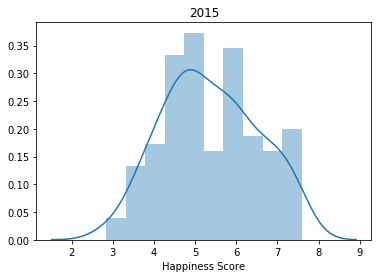

In [187]:
sns.distplot(df15['Happiness Score'], bins = 10).set_title(2015) #density plot of happiness score 
# add titles and labels 

Text(0.5, 1.0, '2015')

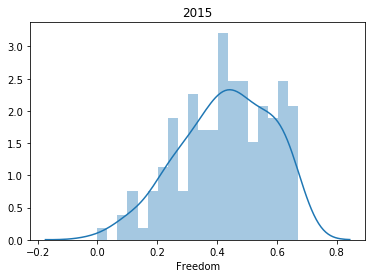

In [149]:
sns.distplot(df15['Freedom'], bins = 20).set_title(2015)

Text(0.5, 1.0, '2015')

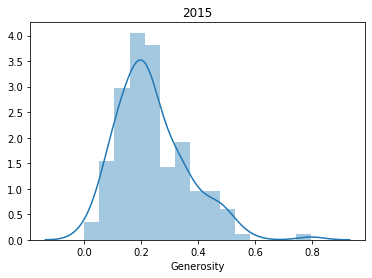

In [156]:
sns.distplot(df15['Generosity'], bins = 15).set_title(2015)

Text(0.5, 1.0, '2015')

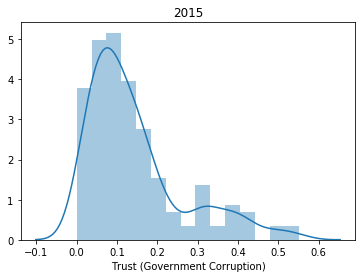

In [155]:
sns.distplot(df15['Trust (Government Corruption)'], bins = 15).set_title(2015)
# most gov corruption lays between 0-0.1

Text(0.5, 1.0, '2015')

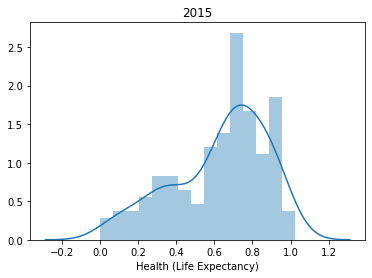

In [158]:
sns.distplot(df15['Health (Life Expectancy)'], bins = 15).set_title(2015)
# most health exp lays around 0.7 - 0.8

Text(0.5, 1.0, '2015')

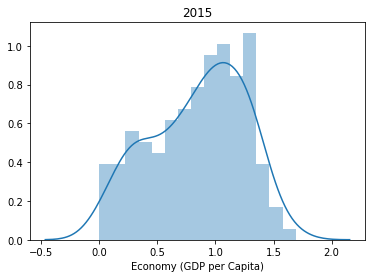

In [160]:
sns.distplot(df15['Economy (GDP per Capita)'], bins = 15).set_title(2015)

### Probability Mass Function

### Region: PMF

In [ ]:
# Chapter 3: Probability Mass Function of Regions in Dataset 
# two scenarios in your data using a PMF, tells you number of regions and happines scores 
# Region & Country 

In [359]:
ddf15 = pd.DataFrame(df15["Region"].value_counts())
ddf15 # datafram with counts of region 

,Region
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
Australia and New Zealand,2
North America,2


In [360]:
lenght = len(df15) # lenght of dataframe 
lenght

158

In [364]:
ddf15 = pd.DataFrame(df15["Region"].value_counts())
ddf15           

,Region
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
Australia and New Zealand,2
North America,2


In [365]:
ddf15.columns = ["Counts"]
ddf15

,Counts
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
Australia and New Zealand,2
North America,2


In [383]:
ddf15["Prob"] = ddf15["Counts"]/lenght
ddf15

,Counts,Prob
Sub-Saharan Africa,40,0.254777
Central and Eastern Europe,29,0.184713
Latin America and Caribbean,22,0.140127
Western Europe,21,0.133758
Middle East and Northern Africa,20,0.127389
Southeastern Asia,9,0.057325
Southern Asia,7,0.044586
Eastern Asia,6,0.038217
Australia and New Zealand,2,0.012739
North America,2,0.012739


Text(0.5, 1.0, 'PMF: Regions')

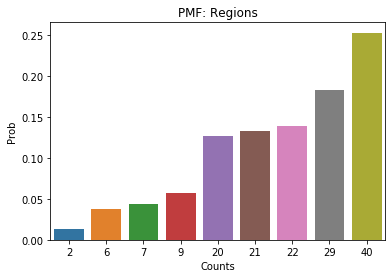

In [376]:
sns.barplot(ddf15["Counts"], ddf15["Prob"]).set_title('PMF: Regions')

### Happiness Score: PMF 

In [388]:
ddf2 = pd.DataFrame(df15["Happiness Score"].value_counts())
ddf2 # dataframe with counts of region 

,Happiness Score
5.192,2
4.642,1
5.098,1
5.129,1
5.889,1
...,...
4.252,1
4.633,1
3.931,1
7.200,1


In [379]:
lenght = len(ddf2) # lenght of dataframe 
lenght

157

In [380]:
ddf2 = pd.DataFrame(df15["Happiness Score"].value_counts())
ddf2 

,Happiness Score
5.192,2
4.642,1
5.098,1
5.129,1
5.889,1
...,...
4.252,1
4.633,1
3.931,1
7.200,1


In [381]:
ddf2.columns = ["Counts"]
ddf2

,Counts
5.192,2
4.642,1
5.098,1
5.129,1
5.889,1
...,...
4.252,1
4.633,1
3.931,1
7.200,1


In [382]:
ddf2["Prob"] = ddf2["Counts"]/lenght
ddf2

,Counts,Prob
5.192,2,0.012739
4.642,1,0.006369
5.098,1,0.006369
5.129,1,0.006369
5.889,1,0.006369
...,...,...
4.252,1,0.006369
4.633,1,0.006369
3.931,1,0.006369
7.200,1,0.006369


Text(0.5, 1.0, 'PMF: Happiness Score')

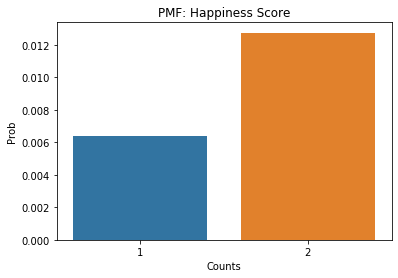

In [384]:
sns.barplot(ddf2["Counts"], ddf2["Prob"]).set_title('PMF: Happiness Score')

### CDF

In [406]:
# Chapter 4: Cumulative Distribution Function
# CDF one of your variables 
# Pg 41-44

In [472]:
s = pd.Series(np.random.normal(loc = 10, scale = 0.1, size = 1000), name = 'Region')
df15 = pd.DataFrame(s)

In [473]:
df155['cdf'] = df155.rank(method = 'average', pct = True)

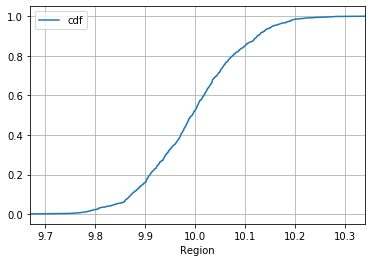

In [474]:
df155.sort_values('Region').plot(x = 'Region', y = 'cdf', grid = True)

### Scatter Plots 

In [ ]:
# Chapter 7 
# 2 scatter plots compare 2 variables, correlation/causation 
# covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

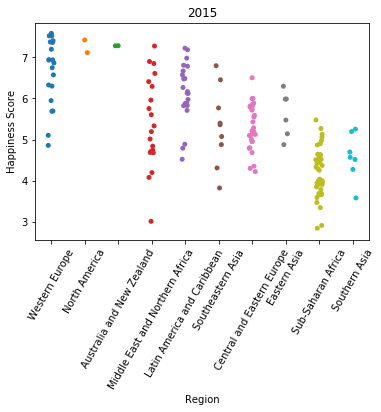

In [195]:
sns.stripplot(x= "Region",y="Happiness Score", data=df15).set_title(2015)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

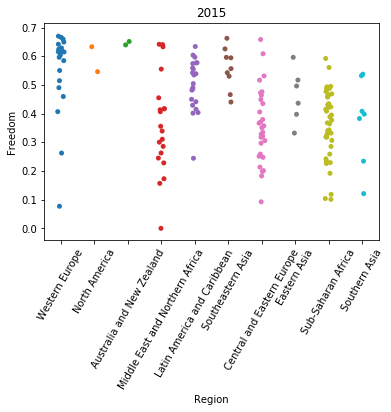

In [194]:
sns.stripplot(x= "Region",y="Freedom", data=df15).set_title(2015)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

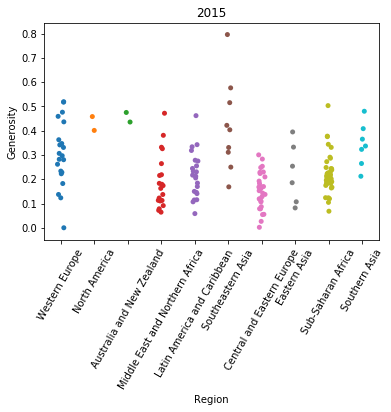

In [193]:
sns.stripplot(x= "Region",y="Generosity", data=df15).set_title(2015)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

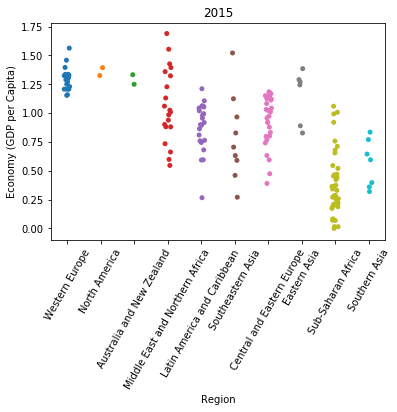

In [192]:
sns.stripplot(x= "Region",y="Economy (GDP per Capita)", data=df15).set_title(2015)
plt.xticks(rotation = 60)

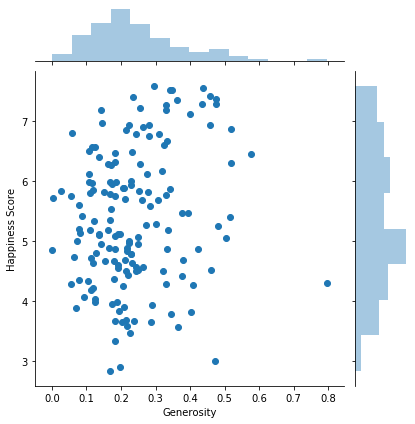

In [209]:
sns.jointplot(x="Generosity", y="Happiness Score", data=df15) # correlation

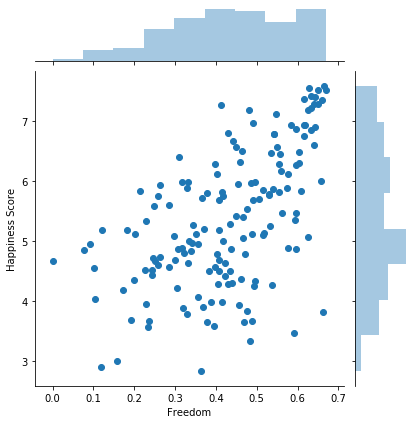

In [208]:
sns.jointplot(x="Freedom", y="Happiness Score", data=df15) # linear correlation 

### Correlation & Correlation Test

### Pearson Correlation Test

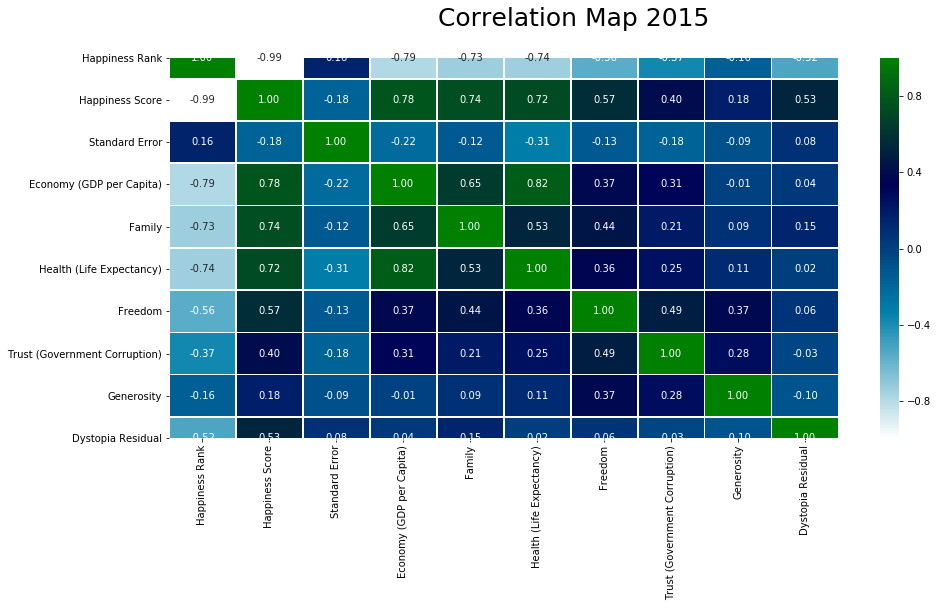

In [430]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df15.corr(), annot=True, linewidths=.7, cmap="ocean_r", fmt=".2f", ax=ax)  # seaborn has very simple solution for heatmap

plt.suptitle("Correlation Map 2015", fontsize=25)

plt.show()   # whitest(-) and greenest(+) = most correlated

# Calculated using Pearson: measures the degree of the relationship btw linearly related variables
# Highest correlation: Economy, Family, Health Life Exp, Freedom. 
# Lowest correlation: Rank, Generosity 

### Kendall Correlation Test 

In [334]:
df15.corr(method="kendall")
# measures strenght of dependence between 2 variables

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-1.000000,0.147823,-0.592945,-0.577303,-0.554185,-0.413465,-0.193920,-0.112719,-0.371377
Happiness Score,-1.000000,1.000000,-0.147823,0.592945,0.577303,0.554185,0.413465,0.193920,0.112719,0.371377
Standard Error,0.147823,-0.147823,1.000000,-0.158381,-0.148381,-0.201210,-0.125640,-0.097339,-0.071449,-0.018548
Economy (GDP per Capita),-0.592945,0.592945,-0.158381,1.000000,0.485286,0.652772,0.286302,0.142552,-0.005241,0.053455
Family,-0.577303,0.577303,-0.148381,0.485286,1.000000,0.407176,0.369830,0.123523,0.096348,0.125695
Health (Life Expectancy),-0.554185,0.554185,-0.201210,0.652772,0.407176,1.000000,0.271074,0.107805,0.070631,0.052248
Freedom,-0.413465,0.413465,-0.125640,0.286302,0.369830,0.271074,1.000000,0.325580,0.283399,0.062807
Trust (Government Corruption),-0.193920,0.193920,-0.097339,0.142552,0.123523,0.107805,0.325580,1.000000,0.142068,0.039831
Generosity,-0.112719,0.112719,-0.071449,-0.005241,0.096348,0.070631,0.283399,0.142068,1.000000,0.005079
Dystopia Residual,-0.371377,0.371377,-0.018548,0.053455,0.125695,0.052248,0.062807,0.039831,0.005079,1.000000


In [438]:
df15.cov() # covariance how each column relates to another 

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,2093.461743,-51.975613,0.124358,-14.483883,-9.142720,-8.316021,-3.839647,-2.044785,-0.928243,-13.220847
Happiness Score,-51.975613,1.311048,-0.003480,0.360476,0.230969,0.204881,0.098042,0.054316,0.026156,0.336225
Standard Error,0.124358,-0.003480,0.000294,-0.001504,-0.000564,-0.001315,-0.000335,-0.000367,-0.000192,0.000797
Economy (GDP per Capita),-14.483883,0.360476,-0.001504,0.162506,0.070852,0.081323,0.022495,0.014898,-0.000534,0.008939
Family,-9.142720,0.230969,-0.000564,0.070852,0.074185,0.035741,0.018122,0.006722,0.003020,0.022332
Health (Life Expectancy),-8.316021,0.204881,-0.001315,0.081323,0.035741,0.061047,0.013422,0.007365,0.003391,0.002596
Freedom,-3.839647,0.098042,-0.000335,0.022495,0.018122,0.013422,0.022708,0.008927,0.007138,0.005237
Trust (Government Corruption),-2.044785,0.054316,-0.000367,0.014898,0.006722,0.007365,0.008927,0.014408,0.004199,-0.002200
Generosity,-0.928243,0.026156,-0.000192,-0.000534,0.003020,0.003391,0.007138,0.004199,0.016049,-0.007104
Dystopia Residual,-13.220847,0.336225,0.000797,0.008939,0.022332,0.002596,0.005237,-0.002200,-0.007104,0.306417


### Regression Analysis

*Regression analysis will be applied to the dependet variable of Happiness score using freedom as a predictor.* 

In [281]:
# simple linear regression
# dependent: Happiness Score 
# independet/predictor: Freedom

In [282]:
data = df15.loc[:,['Freedom','Happiness Score']]
data.head(5)

,Freedom,Happiness Score
0,0.66557,7.587
1,0.62877,7.561
2,0.64938,7.527
3,0.66973,7.522
4,0.63297,7.427


<function matplotlib.pyplot.show(*args, **kw)>

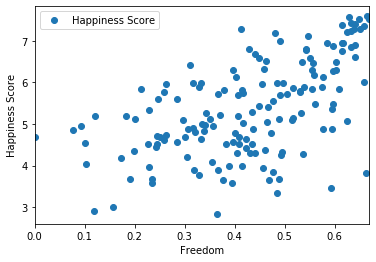

In [283]:
data.plot(x="Freedom", y="Happiness Score", style="o")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.show

In [284]:
X = pd.DataFrame(data['Freedom'])
y = pd.DataFrame(data['Happiness Score'])

In [285]:
# splitting data to create train and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1)

In [286]:
# Shape of train and test data sets 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(126, 1)
(32, 1)
(126, 1)
(32, 1)


In [304]:
# Training algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [305]:
print(regressor.intercept_)

[3.63176702]


In [306]:
print(regressor.coef_)

[[4.01561069]]


In [311]:
# Comparing predicted values to actual values 

y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [312]:
y_pred # predicted values 

,Predicted
0,5.437748
1,4.615551
2,5.824451
3,5.264554
4,5.326957
5,6.208062
6,5.503483
7,6.176700
8,5.875851
9,4.003010


In [293]:
y_test # actual values 

,Happiness Score
29,6.574
107,4.715
14,7.119
81,5.192
124,4.419
19,6.901
73,5.399
11,7.226
40,6.168
95,4.949


In [315]:
# Evaluating the algorithm, 
# MAE: measures accuracy for the Freedom variable on Happiness score, average diff.
# between predicted and actual is minimal at 0.58 
# MeanSquareError: how close a fitted line is to data points  
# RMSE: measures average magnitude of error = variation 0.74
# lower values for both is better
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5802626440433369
Mean Squared Error: 0.554039874779413
Root Mean Squared Error: 0.7443385484975321


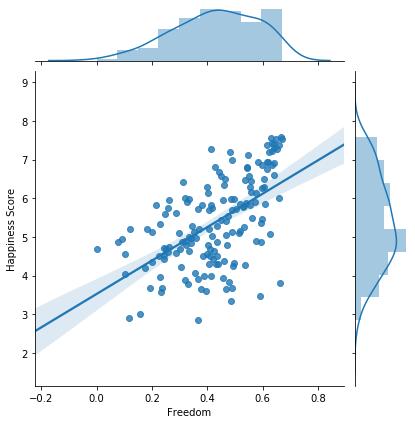

In [255]:
sns.jointplot(x="Freedom", y="Happiness Score", data=df15, kind='reg') 
#linear regression Happiness score w/ freedom (predictor)

## 2016 Dataset
*First five rows of 2016 datset shown below.*

### Variables:

*Country: Name of country*
    
*Region : Region the country pertains to*
    
*Happiness Rank : Rank of the country based on the Happiness Score*
    
*Happiness Score : A metric measured in 2015 by asking the sampled people: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."*

*Lower Confidence Interval: the lower confidence limit of an estimate of a parameter*

*Upper Confidence Interval: the upper confidence limit of an estimate of a parameter*

*Economy (GDP per Capita): real GDP per capita*
    
*Family : social support*
    
*Health (Life Expectancy): healthy life expectancy*
    
*Freedom : freedom to make life choices*
    
*Trust (Government Corruption): perceptions of corruption*
    
*Generosity : perceptions of generosity*
    
*Dystopia Residual: each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark*

In [89]:
df16.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [482]:
df16.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


Text(0.5, 1.0, '2016')

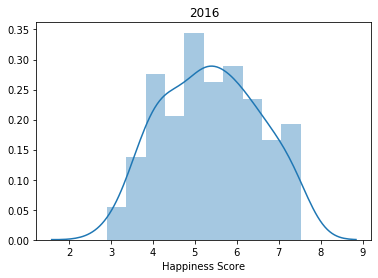

In [140]:
sns.distplot(df16['Happiness Score'], bins = 10).set_title(2016)

Text(0.5, 1.0, '2016')

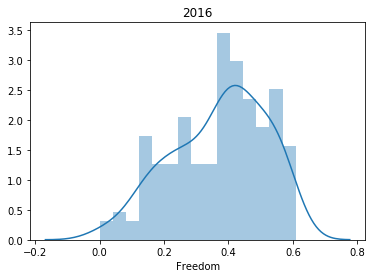

In [145]:
sns.distplot(df16['Freedom'], bins = 15).set_title(2016)

Text(0.5, 1.0, '2016')

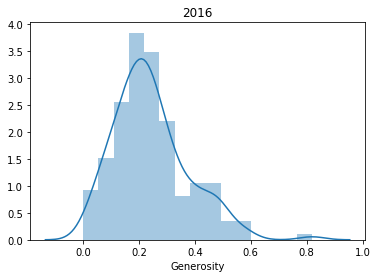

In [162]:
sns.distplot(df16['Generosity'], bins = 15).set_title(2016)

Text(0.5, 1.0, '2016')

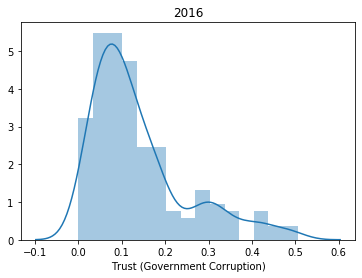

In [163]:
sns.distplot(df16['Trust (Government Corruption)'], bins = 15).set_title(2016)

Text(0.5, 1.0, '2016')

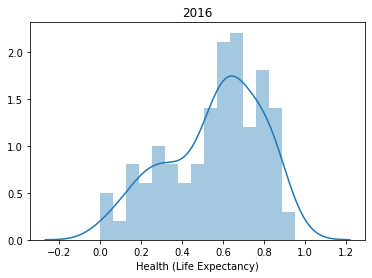

In [164]:
sns.distplot(df16['Health (Life Expectancy)'], bins = 15).set_title(2016)

Text(0.5, 1.0, '2016')

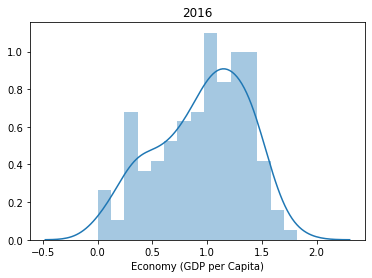

In [432]:
sns.distplot(df16['Economy (GDP per Capita)'], bins = 15).set_title(2016)

In [433]:
#s = pd.Series(np.random.normal(loc = 10, scale = 0.1, size = 1000), name = 'Region')
#df16 = pd.DataFrame(s)
# df166['cdf'] = df166.rank(method = 'average', pct = True
# df166.sort_values('Region').plot(x = 'Region', y = 'cdf', grid = True)

### Scatter Plots 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

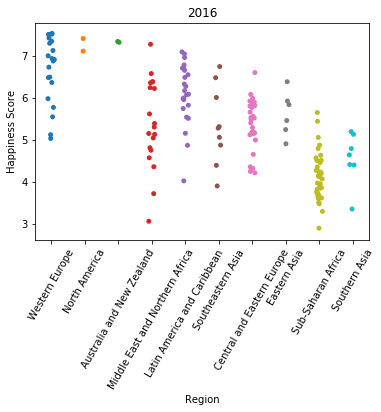

In [196]:
sns.stripplot(x= "Region",y="Happiness Score", data=df16).set_title(2016)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

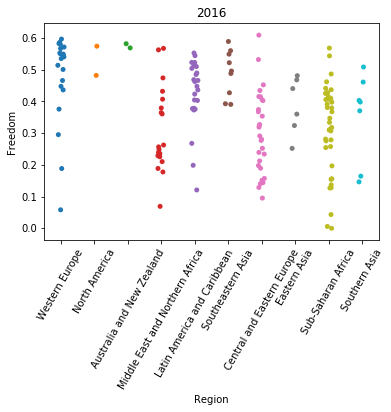

In [197]:
sns.stripplot(x= "Region",y="Freedom", data=df16).set_title(2016)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

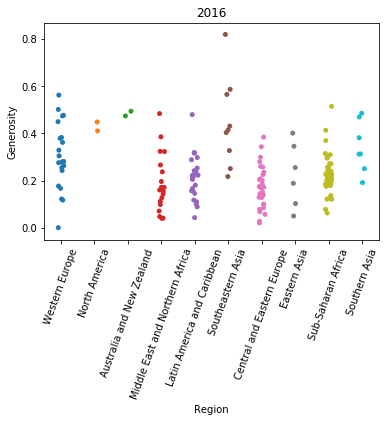

In [481]:
sns.stripplot(x= "Region",y="Generosity", data=df16).set_title(2016)
plt.xticks(rotation = 70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

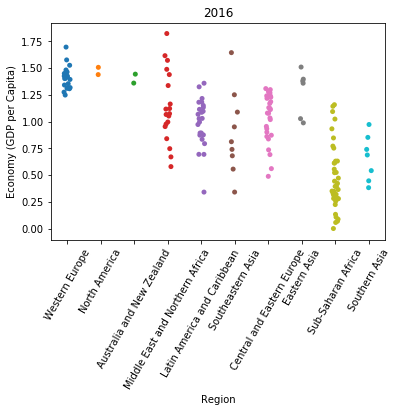

In [201]:
sns.stripplot(x= "Region",y="Economy (GDP per Capita)", data=df16).set_title(2016)
plt.xticks(rotation = 60)

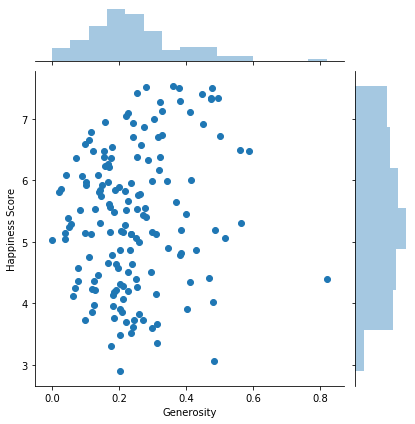

In [202]:
sns.jointplot(x="Generosity", y="Happiness Score", data=df16)

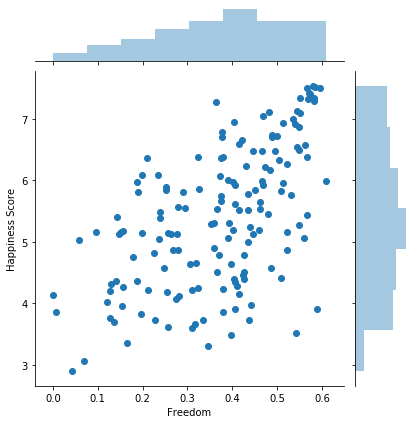

In [203]:
sns.jointplot(x="Freedom", y="Happiness Score", data=df16) 

### Correlation & Correlation Test

### Pearsons Correlation Test

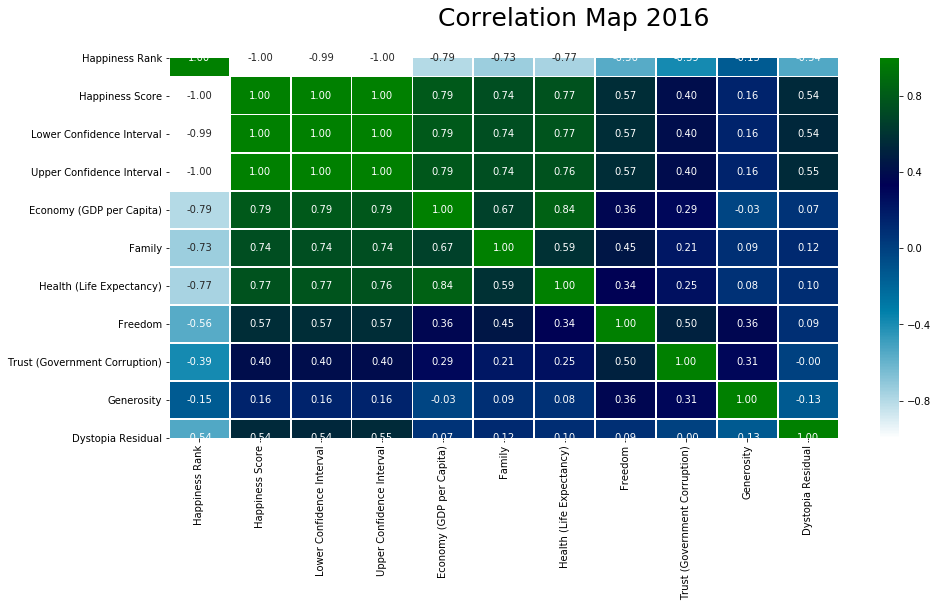

In [177]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df16.corr(), annot=True, linewidths=.7, cmap="ocean_r", fmt=".2f", ax=ax)  # seaborn has very simple solution for heatmap

plt.suptitle("Correlation Map 2016", fontsize = 25)

plt.show()   # whitest(-) and greenest(+) = most correlated

# Calculate Pearson (supports scatterplots visuals)

#Happines Score: Highest correlation with Economy, Health Life Expectancy, Family, 
# followed by freedom.
# Lowest correlation to score: Happiness rank, Generosity, Governmnet

### Kendall Correlation Test 

In [434]:
df16.corr(method="kendall")
# measures strenght of dependence between 2 variables

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-1.000000,-0.987013,-0.984073,-0.611622,-0.568827,-0.568932,-0.405162,-0.206959,-0.097105,-0.392421
Happiness Score,-1.000000,1.000000,0.987013,0.984073,0.611622,0.568827,0.568932,0.405162,0.206959,0.097105,0.392421
Lower Confidence Interval,-0.987013,0.987013,1.000000,0.970840,0.612438,0.569644,0.573995,0.401731,0.206632,0.093838,0.390134
Upper Confidence Interval,-0.984073,0.984073,0.970840,1.000000,0.609171,0.566540,0.565175,0.407285,0.206468,0.094491,0.397158
Economy (GDP per Capita),-0.611622,0.611622,0.612438,0.609171,1.000000,0.502205,0.661386,0.278295,0.143481,-0.011759,0.088029
Family,-0.568827,0.568827,0.569644,0.566540,0.502205,1.000000,0.438283,0.362241,0.118656,0.077413,0.122326
Health (Life Expectancy),-0.568932,0.568932,0.573995,0.565175,0.661386,0.438283,1.000000,0.239843,0.109106,0.046956,0.098567
Freedom,-0.405162,0.405162,0.401731,0.407285,0.278295,0.362241,0.239843,1.000000,0.325916,0.273559,0.067614
Trust (Government Corruption),-0.206959,0.206959,0.206632,0.206468,0.143481,0.118656,0.109106,0.325916,1.000000,0.170267,0.040260
Generosity,-0.097105,0.097105,0.093838,0.094491,-0.011759,0.077413,0.046956,0.273559,0.170267,1.000000,-0.031357


In [437]:
df16.cov()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,2067.159889,-51.686413,-51.932217,-51.440609,-14.886773,-8.891747,-8.008299,-3.686014,-1.954264,-0.884037,-13.376885
Happiness Score,-51.686413,1.303418,1.310015,1.296822,0.372281,0.225095,0.200410,0.094162,0.050965,0.023951,0.336594
Lower Confidence Interval,-51.932217,1.310015,1.318002,1.302027,0.374524,0.227047,0.202526,0.094692,0.051607,0.024266,0.335394
Upper Confidence Interval,-51.440609,1.296822,1.302027,1.291617,0.370037,0.223144,0.198293,0.093631,0.050323,0.023637,0.337795
Economy (GDP per Capita),-14.886773,0.372281,0.374524,0.370037,0.170235,0.073677,0.079210,0.021750,0.013478,-0.001409,0.015352
Family,-8.891747,0.225095,0.227047,0.223144,0.073677,0.071132,0.035990,0.017471,0.006324,0.003197,0.017306
Health (Life Expectancy),-8.008299,0.200410,0.202526,0.198293,0.079210,0.035990,0.052601,0.011386,0.006356,0.002331,0.012542
Freedom,-3.686014,0.094162,0.094692,0.093631,0.021750,0.017471,0.011386,0.021172,0.008112,0.007041,0.007229
Trust (Government Corruption),-1.954264,0.050965,0.051607,0.050323,0.013478,0.006324,0.006356,0.008112,0.012329,0.004544,-0.000175
Generosity,-0.884037,0.023951,0.024266,0.023637,-0.001409,0.003197,0.002331,0.007041,0.004544,0.017891,-0.009646


## Results 

*Outcome:* 

Many factors can influence the way a person measures their level of happiness. During this analysis, people were asked in a survey to rank the extent to which perception of the following factors contributes to happiness scores. The elements used were freedom,  generosity, economy, and family, and the years and 2015 and 2016 were compared. 

Although it was noted that freedom does have a positive correlation, other factors were found to have a more significant impact on the happiness score. Pearson's correlation was measured, and the top three variables with the highest correlation to happiness scores in the years 2015 and 2016 were found to be economy, family, and health.

Regression analysis was applied to the 2015 dataset. This analysis was conducted between freedom and happiness scores, as EDA showed a positive linear relationship. The dependent variable for this analysis was happiness score, and freedom was used as a predictor.  This analysis reflected that the mean absolute error for the variable of freedom is a 0.58 on Happiness score. 

It was also noted that the scatter plots support that regions with the highest sense of freedom tend to have a higher happiness score, as reflected in the data collected from western Europe.  When looking at the histograms for happiness score, 2015 shows a binomial distribution versus 2015, which indicates a closer to normal distribution. The mean score for both years remained consistent at a 5.38. On the other hand, the sense of freedom did decrease from 0.43 in 2015 to 0.37 in the year 2016. 

*What do you feel was missed during the analysis?*

Additional demographic information, such as the socio-economic status of those individuals surveyed, could have been included in this analysis to provide a better understanding to see if their current situation has any weight on the selection of the scores. 

*Were there any variables you felt could have helped in the analysis?*

The inclusion of a variable that measures the relationship between a person's work environment and their happiness score could assist this analysis. 

*Were there any assumptions made you felt were incorrect?*

It was assumed that the level of sense of freedom a person has would have the most significant effect on their happiness score. 

*What challenges did you face, what did you not fully understand?*

It was difficult to understand how the variables were collected, and it required additional research on my end, to fully understand them. 

### Sources Cited 

Gallup (n.d.) Tracking the World's Happiness. Retrieved from https://www.gallup.com/analytics/247355/gallup-world-happiness-report.aspx

United Nations Sustainable Development Solutions Network. (2017). World Happiness Report.[Data file]. Retrieved from https://www.kaggle.com/unsdsn/world-happiness